In [62]:
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

def F1(vertexs):
    if len(vertexs.shape)==1:
        x,y=vertexs
    else:
        x=vertexs[:,0]
        y=vertexs[:,1]
    return (1-x)**2+100*(y-x**2)**2

def F2(vertexs):
    if len(vertexs.shape)==1:
        x,y=vertexs
    else:
        x=vertexs[:,0]
        y=vertexs[:,1]
    return (x**2+y-11)**2+(x+y**2-7)**2

def plotF(x1,x2):
    rcParams['font.size'] = 12
    npts = 200
    x, y = np.mgrid[-3:3:npts*1j, -3:3:npts*1j]
    z = (1-x)**2+100*(y-x**2)**2
    
    fig = plt.figure(figsize=(8, 8))
    levels = np.logspace(0.3, 3, 6)
    plt.contour(x, y, z, levels, cmap="viridis")
    plt.plot(x1,x2,'r+')
    plt.xlabel(r"$x$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.xticks([-3,-0,3])
    plt.yticks([-3,-0,3])
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.show()
    
    
def plotF2(x1,x2):
    rcParams['font.size'] = 12
    npts = 200
    x, y = np.mgrid[-8:8:npts*1j, -8:8:npts*1j]
    z = (x**2+y-11)**2+(x+y**2-7)**2
    
    fig = plt.figure(figsize=(8, 8))
    levels = np.logspace(0.3,3,5)
    plt.contour(x, y, z, levels, cmap="viridis")
    plt.plot(x1,x2,'r+')
    plt.xlabel(r"$x$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.xticks([-8,-0,8])
    plt.yticks([-8,-0,8])
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.show()

In [63]:
def N_M_Method(func,vertexs,alpha=1,beta=2.4,gamma=0.5,sigma=0.5):

    f=func(vertexs)
    n,_=vertexs.shape

    vertexs_index = np.argsort(f)
    vertexs=vertexs[vertexs_index,:]
    f=f[vertexs_index]

    m=np.mean(vertexs[:-1,:],axis=0)

    xk=m+alpha*(m-vertexs[-1,:])
    fxk=func(xk)
    if fxk>=f[0] and fxk<=f[-2]:
        new_vertexs = np.vstack((vertexs[:-1, :], xk))

    elif fxk<=f[0]:
        xp=m+beta*(xk-m)
        fxp=func(xp)
        if fxp<fxk:
            new_vertexs = np.vstack((vertexs[:-1, :], xp))
        else:
            new_vertexs = np.vstack((vertexs[:-1, :], xk))

    elif fxk>f[-2]:
        xc=m+gamma*(vertexs[-1,:]-m)
        fxc=func(xc)
        if fxc<f[-1]:
            new_vertexs = np.vstack((vertexs[:-1, :], xc))

        else:
            new_vertexs = np.zeros_like(vertexs)
            new_vertexs[0, :] = vertexs[0, :]
            for i in range(1, n):
                new_vertexs[i, :] = sigma*(vertexs[i,:] - vertexs[0,:])
    return new_vertexs

0 [-5.   5.2] 39240.0
1 [-4.  16.5] 50.0
2 [-4.  16.5] 50.0
3 [-4.  16.5] 50.0
4 [-4.  16.5] 50.0
5 [0.2734375  0.48671875] 17.498229637742014
6 [0.2734375  0.48671875] 17.498229637742014
7 [0.2734375  0.48671875] 17.498229637742014
8 [0.2734375  0.48671875] 17.498229637742014
9 [0.2734375  0.48671875] 17.498229637742014
10 [0.2734375  0.48671875] 17.498229637742014
11 [ 0.13031006 -0.25007935] 7.888468002611022
12 [ 0.13031006 -0.25007935] 7.888468002611022
13 [ 0.13031006 -0.25007935] 7.888468002611022
14 [0.17486    0.25602131] 5.763413855676019
15 [0.08741999 0.15184903] 2.912361744555766
16 [ 0.13072503 -0.02307209] 0.9169305379409427
17 [ 0.13072503 -0.02307209] 0.9169305379409427
18 [ 0.13072503 -0.02307209] 0.9169305379409427
19 [ 0.13072503 -0.02307209] 0.9169305379409427
20 [ 0.13072503 -0.02307209] 0.9169305379409427
21 [0.1253897  0.04135691] 0.830655087824662
22 [0.10763493 0.02374391] 0.8110986365657435
23 [0.12361867 0.00473916] 0.7791584829065574
24 [0.12361867 0.004739

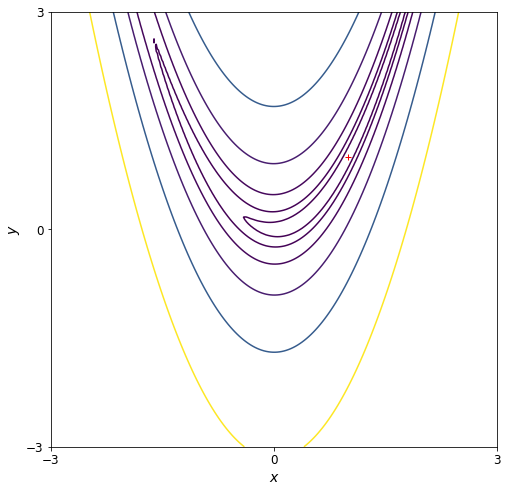

In [64]:
# for F1
a = np.array([5, -10])
b = np.array([6, 1.3])
c = np.array([-5,5.2])
vertexs=np.vstack((a,b,c))
for i in range(300):
    vertexs = N_M_Method(F1,vertexs)
    print(i,vertexs[0,:],F1(vertexs[0,:]))
plotF(vertexs[0,0],vertexs[0,1])

0 [1. 0.] 136.0
1 [1. 0.] 136.0
2 [1. 0.] 136.0
3 [ 4.34375 -0.3125 ] 63.634461402893066
4 [ 4.34375 -0.3125 ] 63.634461402893066
5 [3.4375 2.875 ] 35.74586486816406
6 [1.9921875 2.234375 ] 23.00966078415513
7 [3.52929688 1.12109375] 11.542224920602166
8 [3.09912109 2.27636719] 2.4168985521137643
9 [3.09912109 2.27636719] 2.4168985521137643
10 [3.20272827 1.62127686] 2.1381302178880466
11 [2.90206146 1.95768738] 0.4552729209777712
12 [3.07575798 2.03292465] 0.2867470761461944
13 [3.07575798 2.03292465] 0.2867470761461944
14 [3.04236436 1.90179873] 0.14103717342427302
15 [2.98056132 1.96252453] 0.051835370403785566
16 [2.98056132 1.96252453] 0.051835370403785566
17 [2.98180737 2.04326895] 0.02886981768725171
18 [3.01239737 1.99271994] 0.004801507474072817
19 [3.01239737 1.99271994] 0.004801507474072817
20 [3.01239737 1.99271994] 0.004801507474072817
21 [2.99531801 1.99765456] 0.0011227331545980532
22 [2.99753434 2.00628329] 0.0005879352561784778
23 [2.99753434 2.00628329] 0.000587935256

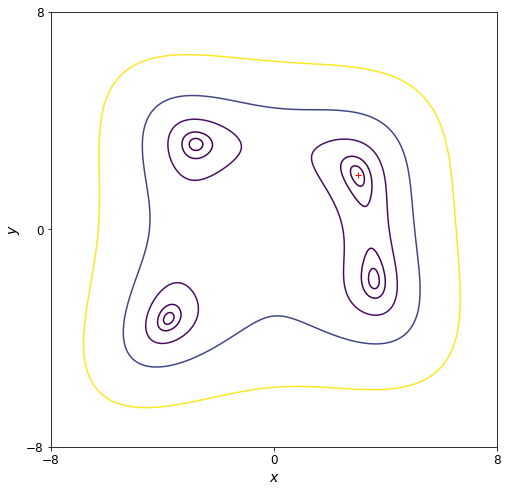

In [65]:
# for F2:
a_ = np.array([6,-9])
b_ = np.array([1,0])
c_ = np.array([8,4])
vertexs_=np.vstack((a_,b_,c_))
for i in range (300):
    vertexs_ = N_M_Method(F2,vertexs_)
    print(i,vertexs_[0,:],F2(vertexs_[0,:]))
plotF2(vertexs_[0,0],vertexs_[0,1])

# The gradient methods

#  The conjugate gradient methods

# The quasi-Newtoon methods